In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/diana/Загрузки/_data.csv')

In [3]:
df = df[['Балкон', 'Окна', 'Санузел', 'Можно с детьми/животными', 'Дополнительно', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Ссылка на объявление']]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Балкон                    15390 non-null  object 
 1   Окна                      16755 non-null  object 
 2   Санузел                   20696 non-null  object 
 3   Можно с детьми/животными  17272 non-null  object 
 4   Дополнительно             23011 non-null  object 
 5   Название ЖК               5848 non-null   object 
 6   Серия дома                2163 non-null   object 
 7   Высота потолков, м        11206 non-null  float64
 8   Лифт                      17868 non-null  object 
 9   Мусоропровод              12846 non-null  object 
 10  Ссылка на объявление      23368 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.0+ MB


__Вывод: значения во всех столбцах, за исключением одного, имеют тип - object. Наша задача: перевести в числовой формат, составить визуальную статистику данных таблиц, а также отфильтровать значения для комфортного чтения таблицы и продуктивного анализа данных таблицы__

__Нам необходимо определить количественную статистику пропусков в CSV-файле к нормальным значениям__

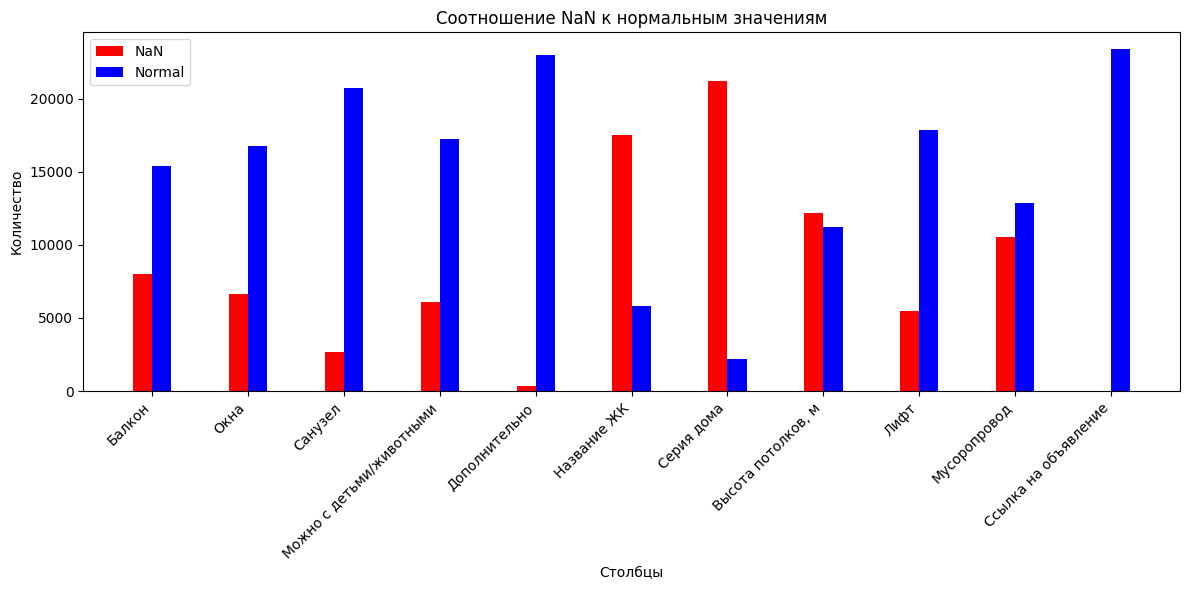

In [29]:
nan_df = df.isna().sum()
normal_df = df.notna().sum()
%matplotlib inline
plt.figure(figsize=(12, 6))
width = 0.2
indices = range(len(df.columns))

plt.bar(indices, nan_df, width=width, label='NaN', color='red')
plt.bar([i + width for i in indices], normal_df, width=width, label='Normal', color='blue')

plt.xlabel('Столбцы')
plt.ylabel('Количество')
plt.title('Соотношение NaN к нормальным значениям')
plt.xticks([i + width / 2 for i in indices], df.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

__Вывод: огромная разница между пропусками и нормальным значением наблюдается в столбцах "Серия дома" и "Название ЖК".__
__Нам необходимо очистить таблицу от NaN.__

In [73]:
nan_cnt = df.isna().sum()
unique_cnt = df.nunique()

In [75]:
summary_table = pd.DataFrame({
    'NaN Count': nan_cnt,
    'Unique Count': unique_cnt
})
print(summary_table)

                          NaN Count  Unique Count
Балкон                         7978            18
Окна                           6613             3
Санузел                        2672            20
Можно с детьми/животными       6096             3
Дополнительно                   357           528
Название ЖК                   17520          1798
Серия дома                    21205           393
Высота потолков, м            12162            95
Лифт                           5500            34
Мусоропровод                  10522             2
Ссылка на объявление              0         23368


### Вывод из таблицы "summary_table":
1. Огромное количество NaN-значений подлежит корректировке;
2. Многие столбцы содержат трудные для восприятия значения. Возможные решения: разделение одного столбца на несколько столбцов;
3. Определение значений в числовой формат для комфортного подведения итогов анализа данных.

### Отдельные комментарии по столбцам:
1. Столбец "Ссылка на объявление" - редактирование значений, поскольку основа ссылки одинаковая во всех строках, трудно для восприятия, в графике будет трудно описать;
2. Столбцы "Мусоропровод", "Можно с детьми/животными", "Окна" - категориальные значения нескольких видов, можно заменить на числовые для удобства;
3. Столбец "Высота потолков, м" - тип данных в столбце float, менять нет необходимости.